# Proyecto de Video juegos hipotetico empresa ICE analisis:

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

In [30]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

import os 
print("Archivos en el directorio actual:")
print(os.listdir(".")) # Verificamos que el archivos del data set si este en la carpeta que vamos a trabajar

# 1 Revisamos el data set para identificar datos nullos a limpiar y familiarizar con la info que tiene 

df = pd.read_csv("games.csv")

df.info() # llamamos al metodo info para conocer el estado del df
df.sample(20) # Tambien al metodo sample para ver una muestra de las primeras 20 filas


Archivos en el directorio actual:
['S6 Project.ipynb', 'games.csv', '.ipynb_checkpoints']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7172,NFL Quarterback Club 97,PS,1996.0,Sports,0.12,0.08,0.00,0.01,NaN,NaN,NaN
3563,The Sims: Bustin' Out,XB,2003.0,Simulation,0.40,0.14,0.00,0.02,81.0,8.9,T
15578,Kung Fu Panda: Showdown of Legendary Legends,X360,2015.0,Action,0.00,0.02,0.00,0.00,NaN,6.8,E10+
4951,SpongeBob vs The Big One: Beach Party Cook Off,DS,2009.0,Adventure,0.24,0.11,0.00,0.04,NaN,tbd,E
16352,Deus Ex,PC,2000.0,Role-Playing,0.00,0.01,0.00,0.00,90.0,9.3,M
2466,Rogue Galaxy,PS2,2005.0,Role-Playing,0.24,0.16,0.39,0.05,83.0,8.4,T
3441,NCAA Football 09,PS3,2008.0,Sports,0.54,0.00,0.00,0.04,81.0,7.3,E
7589,Body and Brain Connection,X360,2010.0,Misc,0.10,0.08,0.00,0.02,57.0,4.8,E
3003,Book of Spells,PS3,2012.0,Action,0.14,0.39,0.00,0.15,NaN,NaN,NaN
946,Phineas and Ferb,DS,2009.0,Action,1.32,0.37,0.00,0.15,80.0,4.5,E


In [31]:
# 2.1 Transformamos y limpiamos la data (Homologamos toda la data a minusculas todos los nombres de las columnas)
df.columns = df.columns.str.lower() 
print(df.columns)
df.duplicated().sum() # verificamos tambien que no hay duplicados explicitos 
df.duplicated("name").sum() # si hay 5155 juegos con el nombre duplicado pero pueden ser en diferentes plataformas
df[df.duplicated(subset=["name","platform"],keep= False)].sort_values("name") # si efectivamente varia la plataforma veamos si hay mas que limpiar
df.drop(16230, axis=0, inplace = True, errors='ignore') # borramos la linea 16230 por que es claramente un repetido
df.drop(4127, axis=0, inplace = True,errors='ignore') # borramos la linea 4127 por que es claramente un repetido
df.drop(659, axis=0, inplace = True, errors='ignore') # borramos la linea 659 por que no tienen nombre
df.drop(14244, axis=0, inplace = True, errors='ignore') # borramos la linea 14244 por que no tienen nombre

print(df[df.duplicated(subset=["name","platform"],keep= False)].sort_values("name")) # verificamos que se hayan borrado efectivamente ya no aparecen
#solo need for spped para 2 diferntes paltaformas y remake en años distintos


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')
                              name platform  year_of_release   genre  \
1190   Need for Speed: Most Wanted     X360           2012.0  Racing   
1591   Need for Speed: Most Wanted     X360           2005.0  Racing   
5972   Need for Speed: Most Wanted       PC           2005.0  Racing   
11715  Need for Speed: Most Wanted       PC           2012.0  Racing   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
1190       0.62      0.78      0.01         0.15          83.0        8.5   
1591       1.00      0.13      0.02         0.10          83.0        8.5   
5972       0.02      0.23      0.00         0.04          82.0        8.5   
11715      0.00      0.06      0.00         0.02          82.0        8.5   

      rating  
1190       T  
1591       T  
5972       T  
11715      T  


In [32]:
# 2.4 TRansformación y limpieza de data  tuvimos que empezar con este punto ya que no dejaba cambiar los valores con el metodo fillna 
# porque nos pide quitar los valores TBD ademas de los NAN para poder poner un valor de 0

tbd_data = df.query("user_score == 'tbd'") # encontramos 2424 registros con tbd (to be determined)

no_tbd =  df.query("user_score != 'tbd'")

print("Distribución por año con Tbd:")
print(tbd_data["year_of_release"].value_counts().head(100)) 
print("año sin tbd")
print(tbd_data["year_of_release"].value_counts().head(100))

print(sorted(df["year_of_release"].unique(), reverse=True))

porcion_juegos_tbd = (2424/16715)*100

print(f" {porcion_juegos_tbd:.2f}%") # la cantidad de juegos con tbd son el 14.5% de los juegos 
# por lo cual no es un error menor aunque las hipotesis que tenia que como todos no tienen user score no cuadran por las fechas como nuevos lanzamientos

print(f"Año promedio juegos CON 'tbd': {tbd_data['year_of_release'].mean():.1f}")
promedio_sin_tbd = df.query("user_score != 'tbd'")['year_of_release'].mean()
print(f"Año promedio juegos SIN 'tbd': {promedio_sin_tbd:.1f}")

# los años promedio no nos dicen que sean nuevos lanzamientos por que eston 2006 y 2007 respectivamente
# lo que nos queda solo es que sean juegos de nichos y al ser una proporcion relativamente no tan grande es posible esta ultima hipotesis
# por lo cual al ser lo juegos con tbd el 14.5% los ponderemos en user_score como un valor coerce que no considere


Distribución por año con Tbd:
year_of_release
2009.0    405
2010.0    331
2008.0    326
2011.0    217
2002.0    192
2007.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: count, dtype: int64
año sin tbd
year_of_release
2009.0    405
2010.0    331
2008.0    326
2011.0    217
2002.0    192
2007.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: count, dtype: int64
[np.float64(2016.0), np.float64(2015.0), np.float64(2014.0), np.float64(2013.0), np.float64(2012.0), np.float64(2011.0), np.float64(2010.0), np.float64(2009.0), np.float64(2008.0), np.float64(2007.0), np.float64(2006.0), np.float64(2005.0), np.float64(2004.0), np.float64(2003.0), np.float64(2002.0), np.float64(2001.0), np.float64(2000.0), n

In [33]:
# 2.2 / 2.3 Transformación y limpieza de data:  Cambio de tipo de dato y porque
# La columna 3 "Year_of_Release" esta en float en vez de int. Ya que son años de lanzamiento
# La columna "Critic_Score" tiene valores todos int pero esta en float
# La columa "User_Score" es object en vez de float


print ("user_score:")
# Paso 1: Crear una variable para identificar los valores 'tbd' originales
tbd_registros = df['user_score'] == 'tbd'

# Paso 2: Convertir a numérico (esto convierte 'tbd' a NaN) usamos parametro coerce para hacerlo a la fuerza si hay error
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Paso 3: Calcular la media de los valores válidos (excluyendo NaN) 
media_user_score = df['user_score'].mean() 

# Paso 4: Rellenar de manera diferenciada

df['user_score'] = df['user_score']

# Luego, específicamente donde había 'tbd', ponemos la media
# Debido son juegos de nicho con pocas calificaciones

df.loc[tbd_registros, 'user_score'] = np.nan # Rellenamos con la media ya que no hay suficientes
#datos de los usuarios en la calificaion pero tampoco es insignificante para dejarlos en 0 ya uqe son 2424 registros que tenian tbd


print(f"Media calculada: {media_user_score:.2f}")
print(f"Nuevos valores NaN:{df['user_score'].isna().any()}") # Esta linea nos valida que no haya ni un solo valor NaN que efectivamente quitamos todos
df["user_score"].fillna(-1).astype(int)
print(df["user_score"].dtype) # cambiamos a float ya que estaba en object (str de pandas)

# Procedemos con la columna year_of_release que aunque no hay un error grave ya que es tipo numerico 
# son numéricos flotados y no enteros (int) y tienen un .0 que sobra
print()
print("year-of_release:")
df["year_of_release"] = df["year_of_release"].fillna(0).astype(int)
df = df[df["year_of_release"] != 0] 
print(df["year_of_release"].dtype)# este codigo nos comprueba el cambio de float a int
print(f"Nuevos valores NaN:{df['year_of_release'].isna().any()}") # Esta linea nos valida que no haya ni un solo valor NaN que efectivamente quitamos todos

print()
print("critic_score:")
df["critic_score"] = df['critic_score'].fillna(-1).astype(int) # en este caso los valores NAN los hcaemos 0 
print(f"Nuevos valores NaN:{df['critic_score'].isna().any()}") # Esta linea nos valida que no haya ni un solo valor NaN que efectivamente quitamos todos

print()
print("rating:")
print(df["rating"].isna().sum())
df["rating"] = df["rating"].fillna("desconocido")
print(df["rating"].isna().sum()) # verificamos cambio de NaN

user_score:
Media calculada: 7.13
Nuevos valores NaN:True
float64

year-of_release:
int64
Nuevos valores NaN:False

critic_score:
Nuevos valores NaN:False

rating:
6676
0


In [34]:
# 2.5 ventas totales suma de las 3 regiones America, Europa, Japon y otros paises (resto del mundo)

df["total_sales"] = df["na_sales"]+df["eu_sales"]+df["jp_sales"]+df["other_sales"]
print(df["total_sales"])
print(df.head()) # verificamos efectivamente funciona nuestra columna total_sales


0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16443, dtype: float64
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score       rating  \
0     28.96      3.77         8.45            76         8.0            E   
1      3.58      6.81         0.77            -1         NaN  desconocido   
2     12.76      3.79         3.29            82         8.3        

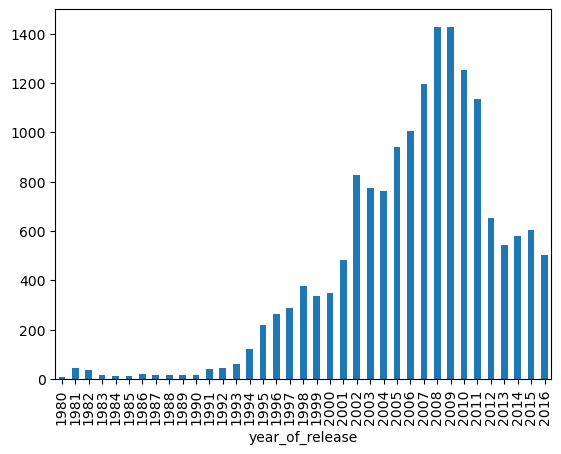

In [35]:
# 3.1 Juegos lanzados por año (patrones de lanzamiento por años)


df.groupby("year_of_release")["name"].count().plot(kind = "bar")
plt.show()


# Como podemos observar de 1980 a 1993 hay pocos lanzamientos de video juegos con menos de 100 
# comienza incrementa del 94 al 2001 y posteriormente al 2008/2009 llega a su punto más alto con casi 1,400 juegos 
# del 2010 al 2016 vemos una disminución de lanzaminetos significativa a la mitad 600 juegos por año. 

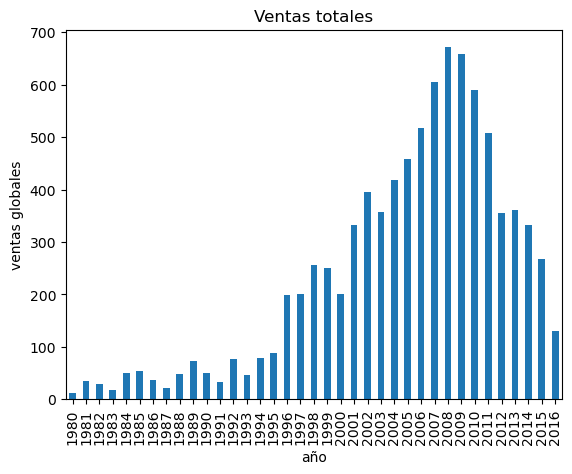

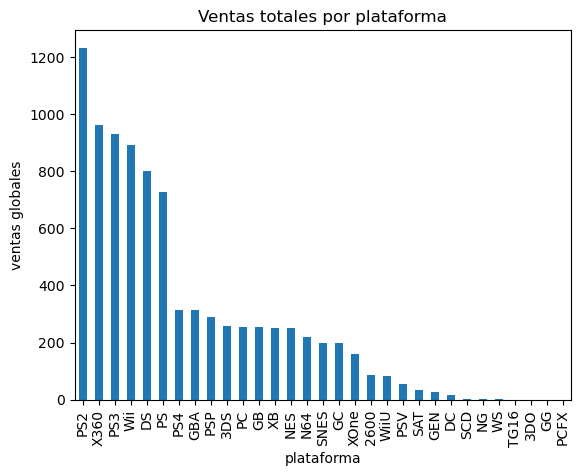

In [36]:
# 3.2 Analisis de las ventas
#Primero revisamos la evolucion de las ventas totales por todos los años 
df.groupby("year_of_release")["total_sales"].sum().plot(
    kind = "bar",
    ylabel = "ventas globales",
    xlabel = "año",
    title= "Ventas totales")
plt.show()
# Ahora revisemos la diferencia de las ventas totales por plataforma
df.groupby("platform")["total_sales"].sum().sort_values(ascending = False).plot(
    kind = "bar",
    ylabel = "ventas globales",
    xlabel = "plataforma",
    title= "Ventas totales por plataforma")
plt.show()

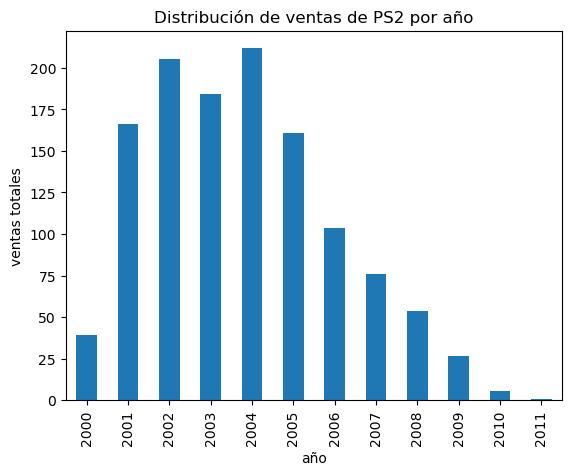

In [37]:
# 3.2.2
ps2 = df[df["platform"] == "PS2"]

# Crear distribución por año
ps2.groupby("year_of_release")["total_sales"].sum().plot(kind="bar")
plt.ylabel("ventas totales")
plt.xlabel("año")
plt.title("Distribución de ventas de PS2 por año")
plt.show()

# 3.2 Analisis de las ventas
Podemos ver que para el caso de PS2 (play station 2 de Sony) el mejor año de ventas a nivel global fue el 2004, seguido por el 2002, y 2003 y 2001 y 2005 del 2006 al 2010 comenzo a descender significativamente, probalemente se debe al lanzamiento de PS3 u otras consolas/ plataformas de la competencia. Normalmente las consolas tenian un tiempo de vida de 4 años.

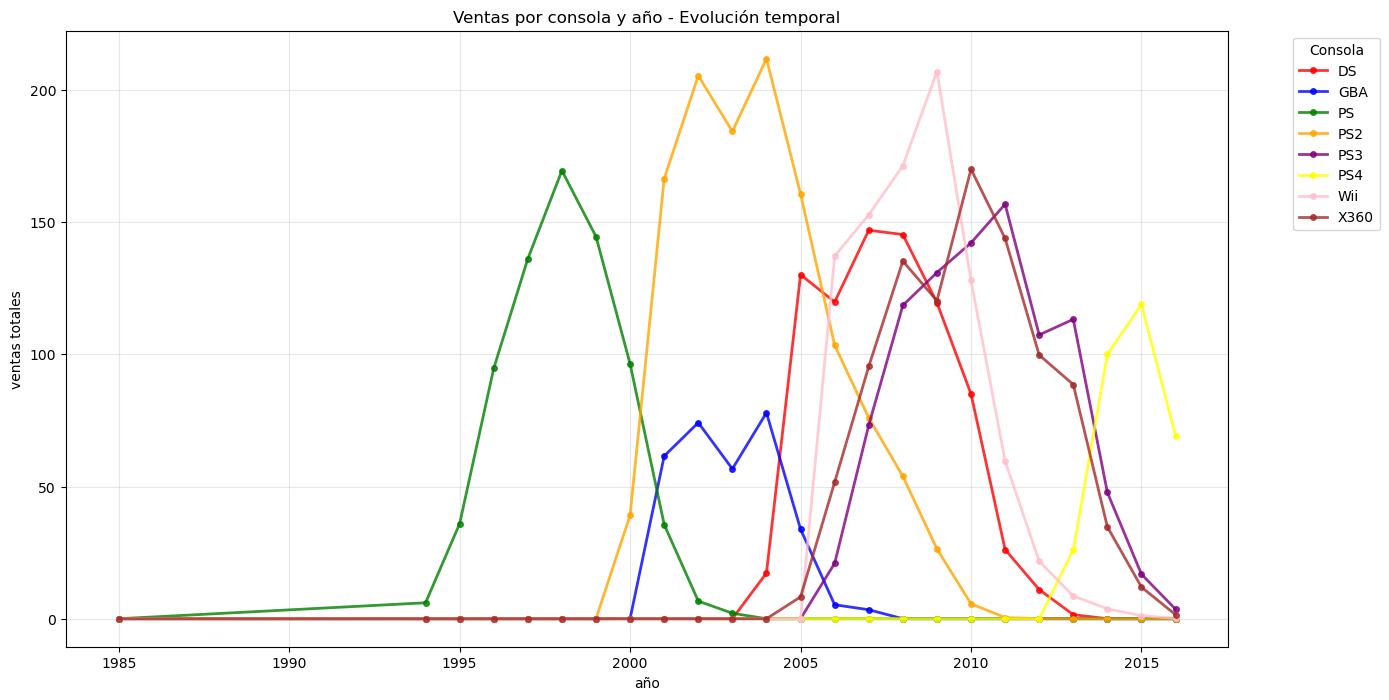

In [38]:
# 3.2.3 Patrones de ciclo de vida consolas 
#(¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?)

# Crear distribución por año para el top 8 de consolas
ventas_por_consola = df[df['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS',"PS4","GBA"])].pivot_table(
    index='year_of_release',
    columns='platform', 
    values='total_sales',
    aggfunc='sum',
    fill_value=0)


# Crear gráfico de barras agrupadas
ventas_por_consola.plot(
    kind='line',
    alpha=0.8,
    figsize=(15, 8),
    ylabel = "ventas totales",
    xlabel = "año",
    title = "Ventas por consola y año - Evolución temporal", 
    linewidth=2,
    marker='o',
    markersize=4,
    color=['red', 'blue', 'green', 'orange', 'purple', 'yellow',"pink","brown"])
plt.legend(title='Consola', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

# 3.2 y 3.5
Podemos observar que la primer consola del top 6 de ventas a lo largo del tiempo de nuestro df es el PS (Play station o play satation 1), la 1er cosola de Sony, lanzada en 1994, con las ultimas ventas hasta el 2003 de casi 10 años, llegando al pico de venta en el 1998, mientras pasaba la estafeta al PS2 también de Sony en el año 2000 cual llego al pico como ya habiamos visto en el año 2004 pero muy cercano a las ventas del 2002 y desaparenciendo en el 2010. También el periodo relevante de ventas es de 2001 a 2006 son 5 años en lo que le da la estafeta al PS3 que inicia en 2006 llega a su maximo en 2001 y decae en 2016 teniendo igual 10 años de vida con aprox 5 a 6 años de ventas más fuertes antes de decaer aunque con una competencia más feroz por parte de Nintendo que saco su consola más vendida historicamente inovando su modelo de negocio de nuevo y reinventadose como ave fenix el Wii y la version nueva del gambeboy y que antes tuvo a su predescesor GBA game boy advanced de la epoca el DS y tambien en segundo lugar una fuerte competencia tambien del X box 360 de Microsoft. Ten

diendo todas estas ultimas vida de 10 años y un perido de ventas más relevantes de 5 a 6 años. Por ultimo cabe mencionar al PS4 consola que toma la estafeta en 2013 llegando este ultimo a su pico en 2015 al parecer pero bajando en 2016.

Plataformas líderes en el mercado son sin duda PS1 a 4 de Sony más X360 de mirsoft y Wii y DS de Nintendo

# 3.3/ 3.4 Periodo de Pronostico de ventas para 2017
Los años que parecen más relevantes para sacar dicho pronóstico son del 2010 al 2016 ya qeu anteriores a estos ya hay consolas que desaparecen por los patrones. por ejemplo el PS4 fue lanzado en 2013 y ya para 2016 el PS3 sus ventas son muy bajas. Teniendo en cuanta una vida util de aprox 10 años, podemos tener un maximo de 6 años atras que son la moda de mejores ventas de una consola, dentro del ciclo de vida.

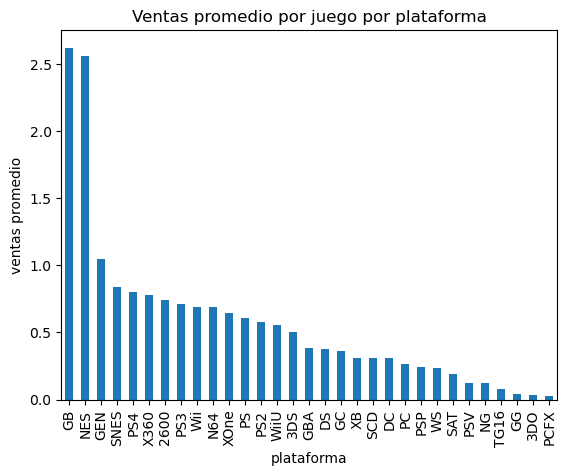

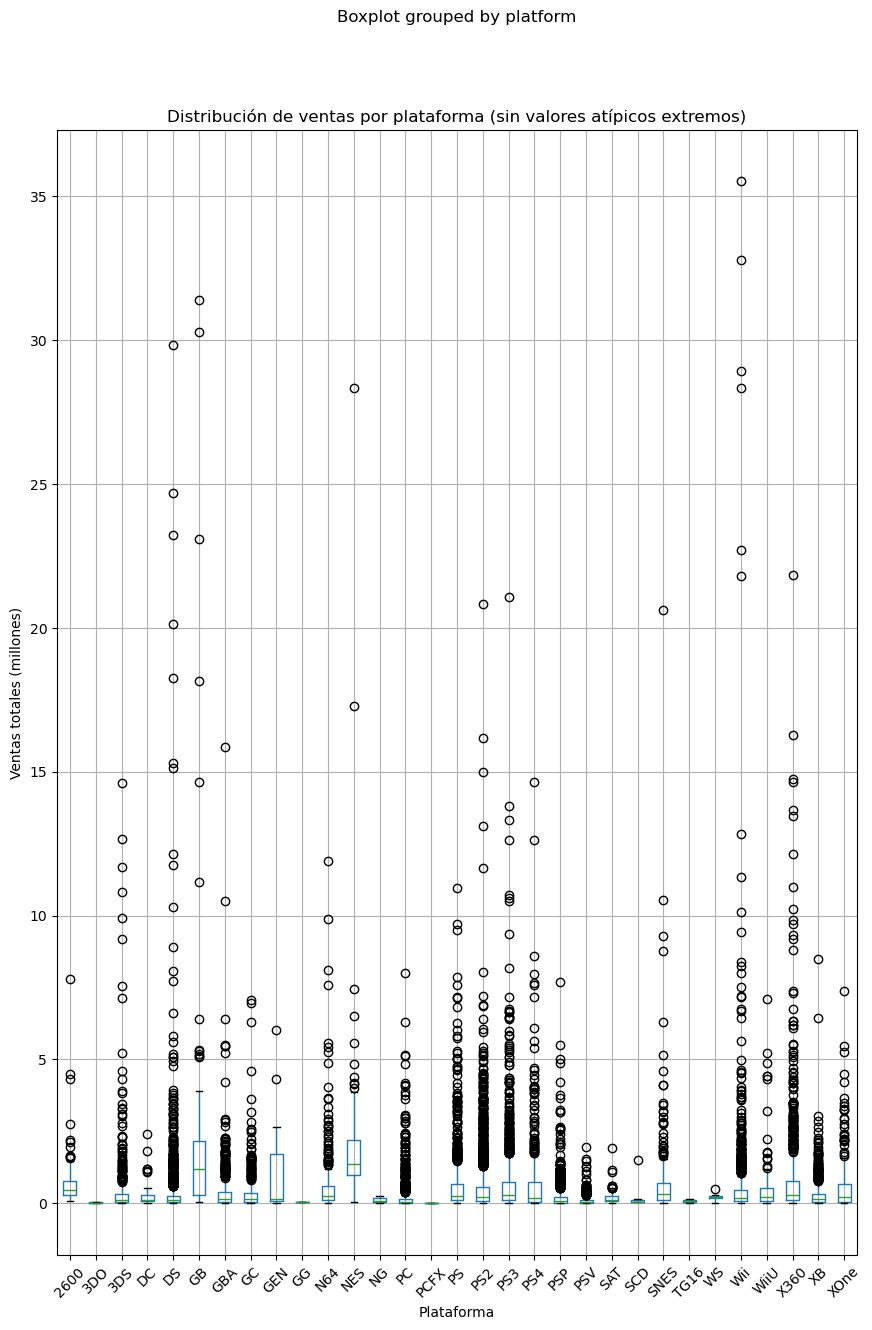

<Figure size 1200x800 with 0 Axes>

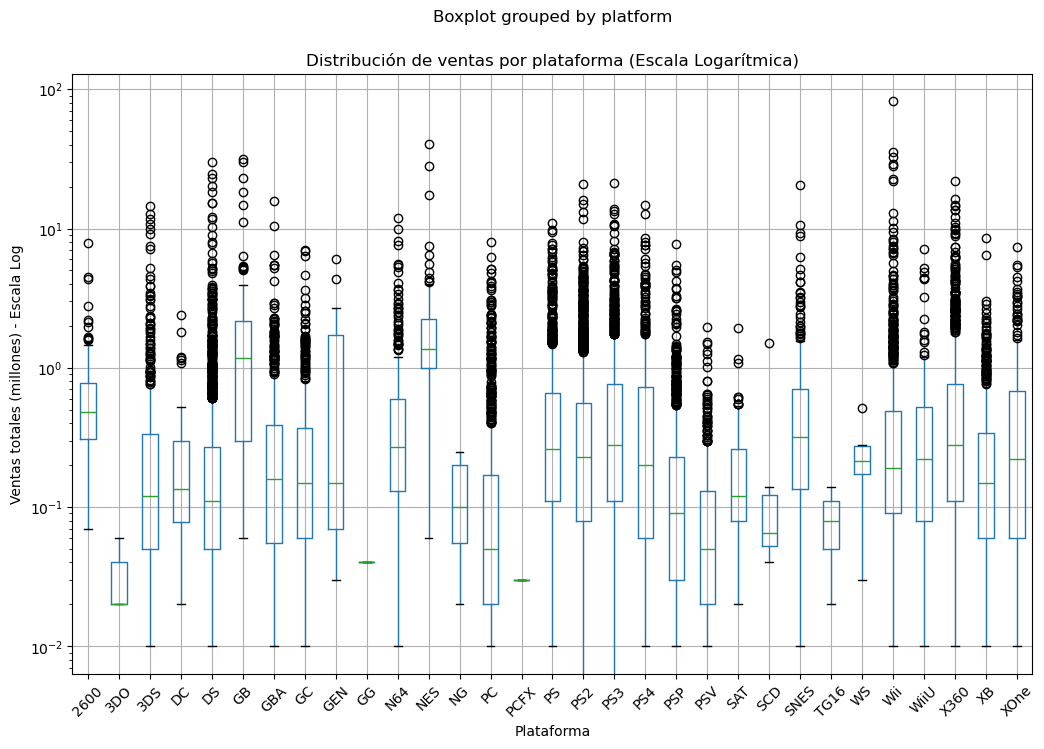

<Figure size 1200x800 with 0 Axes>

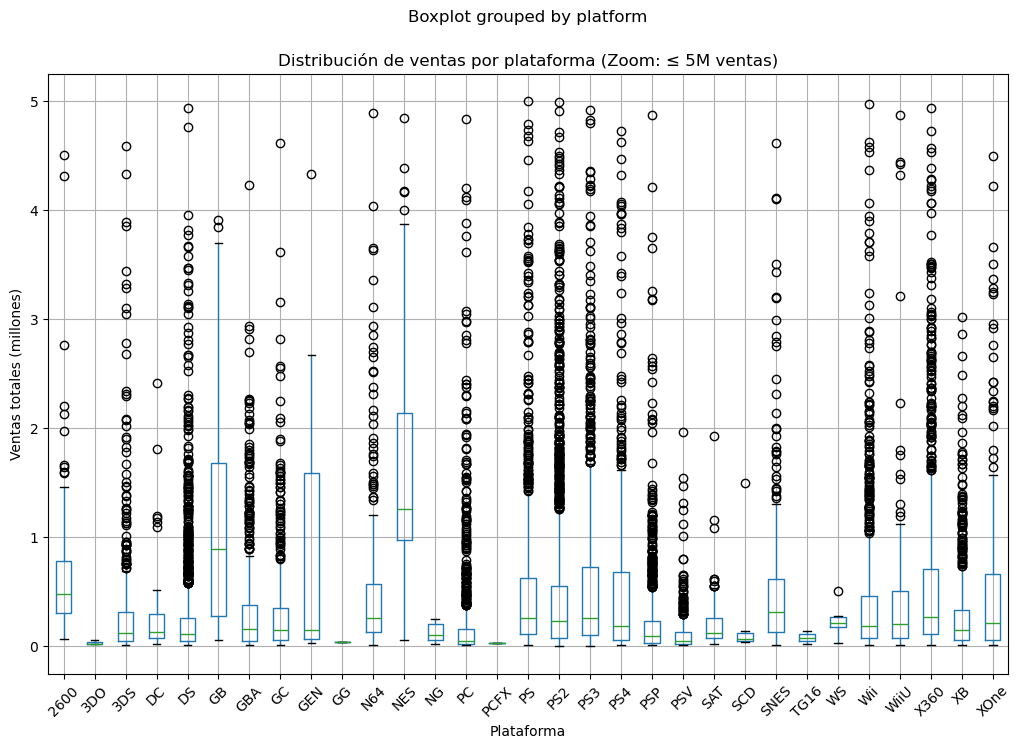

Juego(s) con más de X millones en ventas:
                               name  total_sales  na_sales  eu_sales  \
14               Kinect Adventures!        21.82     15.00      4.89   
23               Grand Theft Auto V        16.27      9.66      5.14   
29   Call of Duty: Modern Warfare 3        14.73      9.04      4.24   
32          Call of Duty: Black Ops        14.62      9.70      3.68   
35       Call of Duty: Black Ops II        13.68      8.25      4.24   
36   Call of Duty: Modern Warfare 2        13.47      8.52      3.59   
44                           Halo 3        12.12      7.97      2.81   
51              Grand Theft Auto IV        11.00      6.76      3.07   
60             Call of Duty: Ghosts        10.24      6.73      2.56   
64                      Halo: Reach         9.86      7.04      1.95   
66                           Halo 4         9.71      6.65      2.28   
70   Call of Duty 4: Modern Warfare         9.32      5.93      2.36   
72                    

In [39]:
# 3.6 Diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.
# (¿Son significativas las diferencias en las ventas?
#¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.)

# Grafica de ventas promedio por video juego por plataforma
df.groupby("platform")["total_sales"].mean().sort_values(ascending = False).plot(
    kind = "bar",
    ylabel = "ventas promedio",
    xlabel = "plataforma",
    title= "Ventas promedio por juego por plataforma")
plt.show()

# Grafica de caja de ventas de video juegos por plataforma 
df_sin_atipico = df[df['total_sales'] < 36]  # Ajuste solo un juego del wii de >80 y de NES > 40 que desajustaban mucho ala escala

df_sin_atipico.boxplot(column='total_sales', by='platform', figsize=(10, 15))
plt.title('Distribución de ventas por plataforma (sin valores atípicos extremos)')
plt.ylabel('Ventas totales (millones)')
plt.xlabel('Plataforma')
plt.xticks(rotation=45)
plt.show()

# Al tener valores atipicos muy lejanos nos distorciona el grafico así que sera necesario tener 2 versiones adicionales 
# 1 con escala logaritmica para compriomir valores grandes y agrandar los pequeños

plt.figure(figsize=(12, 8))
df.boxplot(column='total_sales', by='platform', figsize=(12, 8))
plt.yscale('log')  # ← Esta es la línea clave
plt.title('Distribución de ventas por plataforma (Escala Logarítmica)')
plt.ylabel('Ventas totales (millones) - Escala Log')
plt.xlabel('Plataforma')
plt.xticks(rotation=45)
plt.show()

# 2 Grafico original con zoom a la data 

plt.figure(figsize=(12, 8))
df_zoom = df[df['total_sales'] <= 5]  # Solo juegos con ≤ 5M ventas
df_zoom.boxplot(column='total_sales', by='platform', figsize=(12, 8))
plt.title('Distribución de ventas por plataforma (Zoom: ≤ 5M ventas)')
plt.ylabel('Ventas totales (millones)')
plt.xlabel('Plataforma')
plt.xticks(rotation=45)
plt.show()

#Codigo juego más vendido
juego_venta_atipico = df[(df['platform'] == 'X360') & (df['total_sales'] > 5)]
print("Juego(s) con más de X millones en ventas:")
print(juego_venta_atipico[['name', 'total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']])


# Ventas globales de todos los juegos, desglosados por plataforma

Por lo que podemos ver en las graficas de arriba tanto de las ventas promedio por video juego por plataforma y la distribución de las ventas totales por plataforma de cada juego

Si podemos observar diferencias muy distintas entre plataformas en el caso de Nintendo en varias de sus juegos de diversas platformas en especial para Wii que ha sido el mercado del ultra hit más rotundo teniendo el juego de toda la industria con más ventas de toda la historia con más de \$80 millones por el juego de wii sports, al cambiar disruptivamente su modelo de negocio y haciendo de los video juegos un cambio de paragdima que solo son para Soft potatis. Seguido por otro juego  Mario bros de NES su primer consola con poco más de \$40 millones de ventas totales y en 3 er lugar vienen otro juego de Wii con \$35 millones de ventas totatles de Mario Kart de la Franquicia de Mario, siendo uno de los exitos más rotundos de la historia y mundo de los video juegos. 

En cambio en la caso de las consolas de Sony la play Station solo para el PS3 y PS2 superan los \$20 millones por juego siendo para el PS3 "Grand Theft Auto V" y PS2 "Grand Theft Auto: San Andreas", pero el grueso de sus juegos tienen un compartamiento más bajo de los \$5 millones en ventas. 

Y para el caso de microsoft el mayor juego es Kinect Adventures!  que es una copia del wii sports con \$21 millones sacaron una buena rebanada del pastel de los jugosos, \$80 millones que dejo el ultra hit de Wii sports de Nintendo bien analizada la competencia por parate de Bill & co. Aunque en sus 3 consolas el comportamniento es más similas al de Sony. 

Podemos Ver e Nintendo como el jugador disruptivo que cambia la historia aunque ha estado varias veces apunto de la muerte financiera, a Sony como el estable y astuto en tener una parte interesante del mercado clasico pero con buenas ventas como marca en todas sus plataformas y a Microsoft como el astuto ladron que hace pillaje contra sus contrincantes para tener algo interesante para ofrecer contra los nipones. 

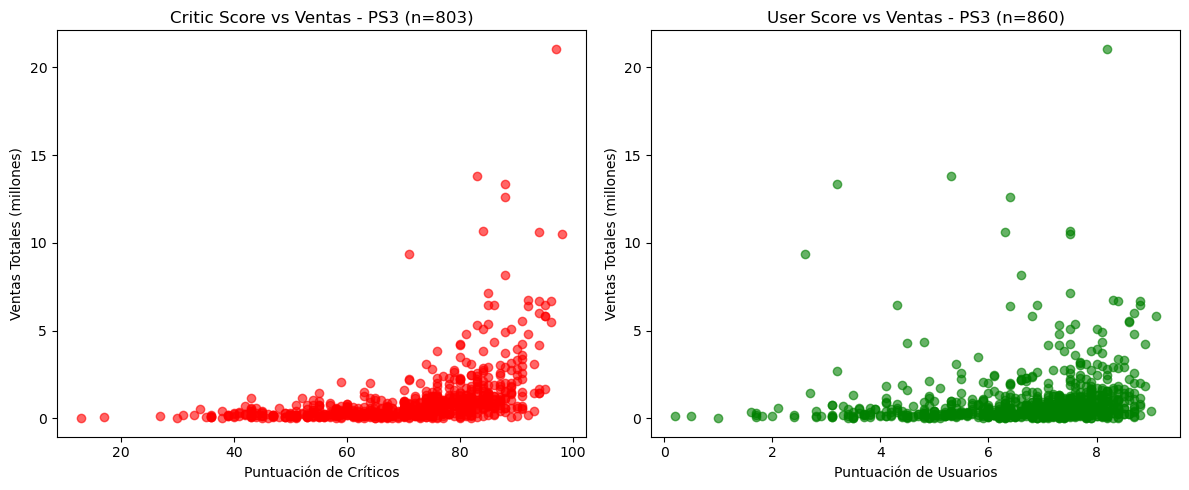

Correlación Critic Score - Ventas: 0.4337 (n=803 juegos)
Correlación User Score - Ventas: 0.1279 (n=860 juegos)


In [40]:
# 3.7 Correlacion entre ventas y reseñas de usuarios (user_score & critic_score vs total_sales)
ps3_data = df[df['platform'] == 'PS3']

# Filtrar solo juegos con puntuaciones válidas
ps3_con_critic = ps3_data[ps3_data['critic_score'] != -1]  # Excluir los -1 para no distorsionar el analisis de correlación
ps3_con_user = ps3_data[ps3_data['user_score'].notna()]    # Excluir los NaN para no distorsionar el analisis de correlación

# Diagrama de dispersión 1: Critic Score vs Ventas totales (solo datos válidos)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(ps3_con_critic['critic_score'], ps3_con_critic['total_sales'], alpha=0.6, color="red")
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales (millones)')
plt.title(f'Critic Score vs Ventas - PS3 (n={len(ps3_con_critic)})')

# Diagrama de dispersión 2: User Score vs Ventas totales (solo datos válidos)
plt.subplot(1, 2, 2)
plt.scatter(ps3_con_user['user_score'], ps3_con_user['total_sales'], alpha=0.6, color="green")
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Totales (millones)')
plt.title(f'User Score vs Ventas - PS3 (n={len(ps3_con_user)})')
plt.tight_layout()
plt.show()

# Calcular correlaciones solo con datos válidos
correlacion_critic = ps3_con_critic['critic_score'].corr(ps3_con_critic['total_sales'])
correlacion_user = ps3_con_user['user_score'].corr(ps3_con_user['total_sales'])

print(f"Correlación Critic Score - Ventas: {correlacion_critic:.4f} (n={len(ps3_con_critic)} juegos)")
print(f"Correlación User Score - Ventas: {correlacion_user:.4f} (n={len(ps3_con_user)} juegos)")

## Conclusiones
De lo que podemos ver es una correlacion positiva moderada tirando a debil con respecto a la calificación de los criticos porfesionales de l alindustria y en el caso de la puntuación por parte de los usaurios no es menos relevante siendo debil la correlacion con las ventas, por lo que podemos determinar que no existe una correlacion significativa y que las ventas se deben a diversos factores como la calidad del juego, arte, Originalidad, audiencia objetivo, puclicidad, reputacion del estudio que crea el juego, precio entre otros. 

Hay 2748 juegos múltiplataforma

Top 100 juegos con más plataformas:
                                             name  num_plataformas
6640                  Need for Speed: Most Wanted               10
2915                                      FIFA 14                9
7703                                  Ratatouille                9
5081                     LEGO Marvel Super Heroes                9
2916                                      FIFA 15                8
...                                           ...              ...
5075  LEGO Indiana Jones: The Original Adventures                6
5904                                    Minecraft                6
772                        Ben 10 Galactic Racing                6
5599                    Marvel: Ultimate Alliance                6
5848              Michael Jackson: The Experience                6

[100 rows x 2 columns]
'FIFA 14' salió en: ['PS3', 'X360', 'PS4', 'XOne', 'PSV', 'PC', 'Wii', '3DS', 'PSP']

=== ANÁLISIS DE '

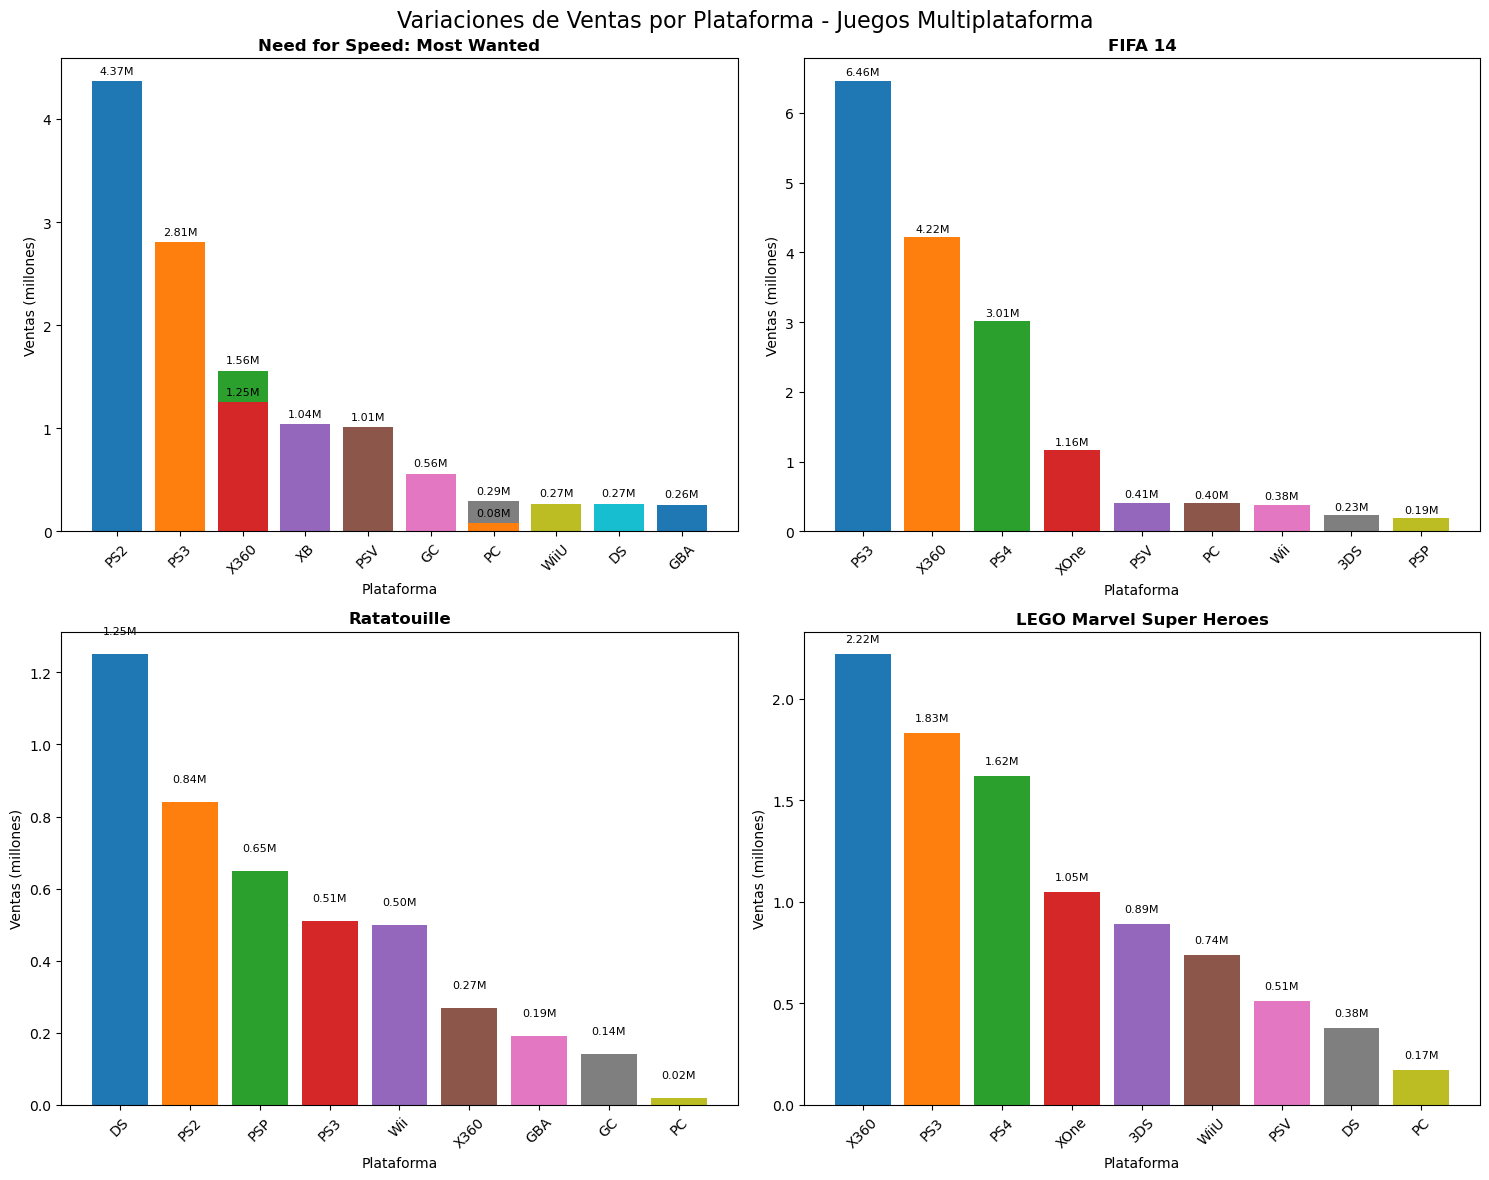

In [41]:
# 3.8 Comparacion de mismos juegos en diversas plataformas

#filtro_multiplataforma = df.query("name is in platform")["platform"]

# Contar cuántas plataformas tiene cada juego
juegos_multiplataforma = df.groupby('name')['platform'].nunique().reset_index()
juegos_multiplataforma.columns = ['name', 'num_plataformas']
juegos_multiplataforma = juegos_multiplataforma[juegos_multiplataforma['num_plataformas'] > 1] # Filtrar juegos que aparecen en más de 1 plataforma

print(f"Hay {len(juegos_multiplataforma)} juegos múltiplataforma")
print("\nTop 100 juegos con más plataformas:")
print(juegos_multiplataforma.sort_values('num_plataformas', ascending=False).head(100))

# Ejemplo: ver en qué plataformas salió un juego específico
nombre_juego = "FIFA 14"  # Cambia por el juego que quieras
plataformas_juego = df[df['name'] == nombre_juego]['platform'].unique()
print(f"'{nombre_juego}' salió en: {list(plataformas_juego)}")

# Obtener los nombres de juegos multiplataforma
nombres_multiplataforma = juegos_multiplataforma['name'].tolist()

# Filtrar el DataFrame original con esos nombres
df_multiplataforma = df[df['name'].isin(nombres_multiplataforma)]

# Ahora sí puedes hacer el análisis de ventas
def analizar_variaciones_juego(nombre_juego):
    juego_data = df[df['name'] == nombre_juego].copy()
    if len(juego_data) > 1:
        print(f"\n=== ANÁLISIS DE '{nombre_juego}' ===")
        print(f"Disponible en {len(juego_data)} plataformas")
        
        # Ordenar por ventas totales
        juego_data = juego_data.sort_values('total_sales', ascending=False)
        
        # Mostrar tabla de ventas
        print("\nVentas por plataforma:")
        print("Plataforma | Ventas Totales | NA    | EU    | JP    | Otros")
        print("-" * 60)
        for _, row in juego_data.iterrows():
            print(f"{row['platform']:10} | {row['total_sales']:11.2f} | {row['na_sales']:4.2f} | {row['eu_sales']:4.2f} | {row['jp_sales']:4.2f} | {row['other_sales']:4.2f}")
        
        # Calcular estadísticas de variación
        max_ventas = juego_data['total_sales'].max()
        min_ventas = juego_data['total_sales'].min()
        diferencia = max_ventas - min_ventas
        porcentaje_variacion = (diferencia / max_ventas) * 100
        
        print(f"\nEstadísticas de variación:")
        print(f"Mejor plataforma: {juego_data.iloc[0]['platform']} ({max_ventas:.2f}M)")
        print(f"Peor plataforma: {juego_data.iloc[-1]['platform']} ({min_ventas:.2f}M)")
        print(f"Diferencia: {diferencia:.2f}M ({porcentaje_variacion:.1f}% de variación)")
        
        return juego_data
    else:
        print(f"'{nombre_juego}' no es multiplataforma")
        return None

# Analizar los juegos con más plataformas
top_juegos = ['Need for Speed: Most Wanted', 'FIFA 14', 'Ratatouille', 'LEGO Marvel Super Heroes']

for juego in top_juegos:
    analizar_variaciones_juego(juego)


# Lista de juegos a analizar
top_juegos = ['Need for Speed: Most Wanted', 'FIFA 14', 'Ratatouille', 'LEGO Marvel Super Heroes']

# Crear subplots para mostrar todos los juegos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Variaciones de Ventas por Plataforma - Juegos Multiplataforma', fontsize=16)

# Función para crear gráfica individual
def crear_grafica_juego(nombre_juego, ax):
    juego_data = df[df['name'] == nombre_juego].copy()
    juego_data = juego_data.sort_values('total_sales', ascending=False)
    
    # Crear gráfica de barras
    bars = ax.bar(juego_data['platform'], juego_data['total_sales'], 
                  color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                         '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'][:len(juego_data)])
    
    ax.set_title(f'{nombre_juego}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Plataforma')
    ax.set_ylabel('Ventas (millones)')
    ax.tick_params(axis='x', rotation=45)
    
    # Agregar valores en las barras
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{height:.2f}M', ha='center', va='bottom', fontsize=8)
    
    return juego_data

# Crear las 4 gráficas
axes_flat = axes.flatten()
for i, juego in enumerate(top_juegos):
    crear_grafica_juego(juego, axes_flat[i])

plt.tight_layout()
plt.show()

# Analisis juego multiplataforma top 4 como muestra

##En cuanto a los juegos top 4, tenemos: 

### Need for Speed: Most Wanted

Para este juego que es original y con más éxito en PS2 y es la plataforma donde más ventas tuvo, seguido de PS3 y X360 Que tanto para esta 3er barra como para la de PC estan 2 veces no por error sino por un remake o re lanzamiento del mismo juego. Y en este caso los ultimos 5 valores son marginales. 

### Fifa 14

En este caso la consola con más ventas es también de sony la PS3 seguida de X360 y PS4 y el Xone en cuarto ya con mucho menos cuota de mercado, las 5 siguientes son marginales. 

### Ratouille 

En este caso fue El DS de Nintendo en 1 er lugar seguido de PS2 con 3/4 del valor del 1°, luego PSP 1 con el 50% del 1° y luego PS3 y Wii con menos de la mitad y ya deciende en los ultimos 4 en valores no significativos. 

### Lego Marvel super heroes

En este  caso fue X360 de Micrsoft el 1° lugar, seguido de PS3 y PS4 con valores cercanos a un 80 y 70% del 1°. Cuarto Xone y 5° 3DS con aprox el 50% y 4 menores ultimos pero no marginales. 

Ahora lo que podemos concluir es que no hay un patron definido o comun entre los juegos multiplataforma que sea extrapolable a la mayoria, ya que dependen los patrones por cada juego que se asemajan más a una obra de arte que a un objeto completamente predecible. Aunque sea el mismo juego en funcionalidad temas como el tipo de control puede afectar, o la familiaridad de los jugadores a determinada consola de lanzamiento original. Lo que si es en general claro es que un mismo juego o de la misma franquicia si tendrá un éxito relativamente bueno en proximas generaciones de plataformas de la misma empresa. Pero no podemos determinar un patron general para todos los juegos multiplataforma.  

TOP 5 GÉNEROS MÁS RENTABLES (por venta promedio):
              Ventas_Totales  Promedio_por_Juego  Num_Juegos  \
genre                                                          
Platform              825.55                0.94         878   
Shooter              1041.36                0.80        1296   
Role-Playing          931.08                0.63        1481   
Racing                723.49                0.59        1226   
Sports               1309.66                0.57        2305   

              potencial_mercado  
genre                            
Platform                 825.32  
Shooter                 1036.80  
Role-Playing             933.03  
Racing                   723.34  
Sports                  1313.85  


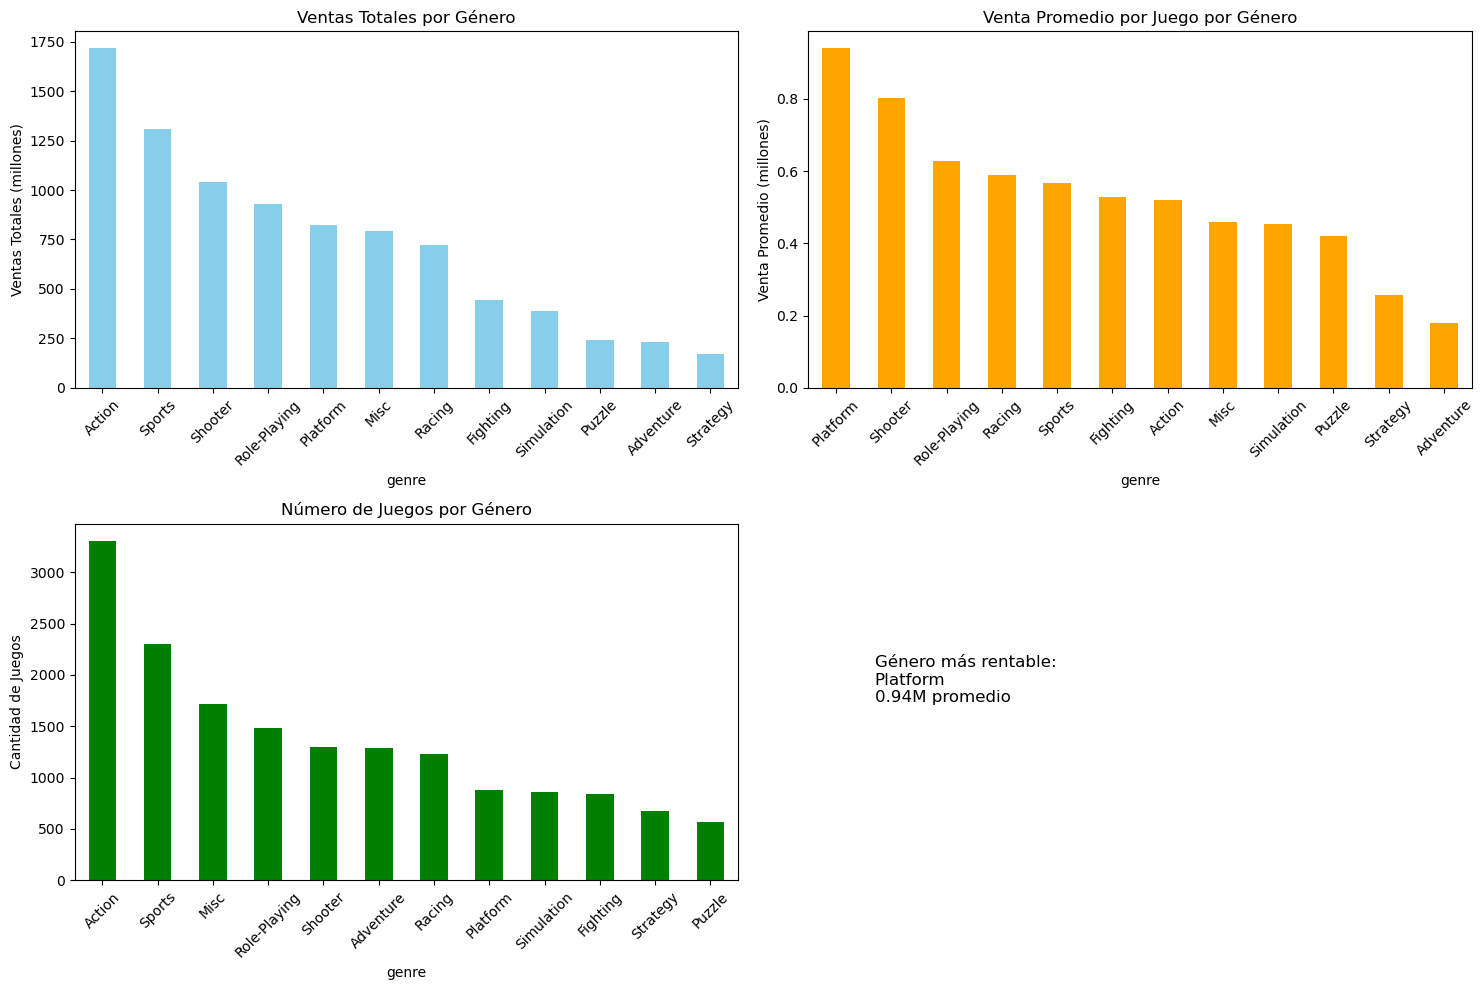


ANÁLISIS DE RENTABILIDAD POR GÉNERO
              Ventas_Totales  Promedio_por_Juego  Num_Juegos  \
genre                                                          
Platform              825.55                0.94         878   
Shooter              1041.36                0.80        1296   
Role-Playing          931.08                0.63        1481   
Racing                723.49                0.59        1226   
Sports               1309.66                0.57        2305   
Fighting              442.66                0.53         837   
Action               1716.52                0.52        3307   
Misc                  790.29                0.46        1721   
Simulation            387.96                0.45         857   
Puzzle                239.89                0.42         569   
Strategy              172.57                0.26         673   
Adventure             233.33                0.18        1293   

              potencial_mercado  
genre                           

In [29]:
# 3.9 Análisis de rentabilidad por género (CORRECCIÓN)

# Gráfico original de ventas totales 
plt.figure(figsize=(15, 10))

# Subplot 1: Ventas totales por género 
plt.subplot(2, 2, 1)
df.groupby("genre")["total_sales"].sum().sort_values(ascending=False).plot(
    kind="bar",
    color='skyblue')
plt.title("Ventas Totales por Género")
plt.ylabel("Ventas Totales (millones)")
plt.xticks(rotation=45)

# Subplot 2:  Venta promedio por juego por género
plt.subplot(2, 2, 2)
df.groupby("genre")["total_sales"].mean().sort_values(ascending=False).plot(
    kind="bar",
    color='orange')
plt.title("Venta Promedio por Juego por Género")
plt.ylabel("Venta Promedio (millones)")
plt.xticks(rotation=45)

# Subplot 3:  Número de juegos por género
plt.subplot(2, 2, 3)
df.groupby("genre").size().sort_values(ascending=False).plot(
    kind="bar",
    color='green')
plt.title("Número de Juegos por Género")
plt.ylabel("Cantidad de Juegos")
plt.xticks(rotation=45)

# Subplot 4:   Tabla comparativa
plt.subplot(2, 2, 4)
# Crear tabla resumen
rentabilidad_genero = df.groupby("genre").agg({
    'total_sales': ['sum', 'mean', 'count']
}).round(2)
rentabilidad_genero.columns = ['Ventas_Totales', 'Promedio_por_Juego', 'Num_Juegos']
rentabilidad_genero['potencial_mercado'] = rentabilidad_genero['Promedio_por_Juego'] * rentabilidad_genero['Num_Juegos']

rentabilidad_genero = rentabilidad_genero.sort_values('Promedio_por_Juego', ascending=False)

potencial_mercado = rentabilidad_genero.sort_values('potencial_mercado', ascending=False)


# Mostrar top 5 más rentables
print("TOP 5 GÉNEROS MÁS RENTABLES (por venta promedio):")
print(rentabilidad_genero.head())

plt.axis('off')  # Quitar ejes para este subplot
plt.text(0.1, 0.5, f"Género más rentable:\n{rentabilidad_genero.index[0]}\n{rentabilidad_genero.iloc[0]['Promedio_por_Juego']:.2f}M promedio", 
         fontsize=12, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

# Análisis detallado
print("\n" + "="*60)
print("ANÁLISIS DE RENTABILIDAD POR GÉNERO")
print("="*60)
print(rentabilidad_genero)
print(potencial_mercado) # es la multiplicacion de la vnta primedio * numero de juegos varia lijeramente vs ventas totales pero las categorias se manienen igual

# Conclusiones de ventas por genero en el top 5 

## Primero: 
Podemos analizar que de todos los juegos del df los preferidos en cuanto a generos es acción, muy probablemente por que es una categoría donde los hardcore gamers en especial hombres en su demografía están mucho tiempo e invierten en estos juegos. Siendo el top 5 la franquicia de Grandtheft auto, con la fortuna de $1,750 M USD seiendo un juego AAA del estudio Rockstar games. 

## Segundo: 
En el puesto 2 los de deportes que también es un genero interesante tanto por video juegos como FIFA y Maden que son de orientación masculina pero también destacan ultra hits como wii sports que revoluciono la idustria dando diversión familiar e itegrando un mercado fuera de los hardcore gamers. Siendo la 2° categoría la más importante con la myor parte de los juegos en el top 5 de ventas salvo el ultimo lugar que lo tiene el FIFA 16 pertenciente al 1er grupo antes descrito en este genero. casi con un valor de $1.3 M USD. Nada mal para Nintendo y FIFA.  

## Tercero: 

Shooters en primer lugar el Duck hunt calsico de NES pobres patos, seguidos de la franquicia de call of duty tanto para PSPs como XBOXs, aunque en el primero es un clasico más sencillo y de destreza con la pistola electronica de controlador, los ultimos van al mismo segmento de hardcore gamers con temática de guerra. Ni modo la guerra sigue vendiendo =(. Poco más de $1,000 M USD. 

## Cuarta

En Roll playing , se lleva el primer lugar pokemon version azul / roja, Charmander y  Squirtle estrán celebrando en su jatte privado. Seguido por la mismsa franquicia en diferentes plataformas de Nintendo. Es un segmento más enfocado a niños y vaya como me quito tiempo en la infancia llegar a ser el lider pokemon y vencer al equipo rocket.  Con poco menos de $1,000 M USD. 

## Quinto

Es esta categoría de plataforma es la franquicia de Mario bros la iniscutible lider dentro del top 5 donde otra vez Nintendo se lleva esos buenos reuerdos memorable sde horas de entretenimiento de la infancia con aprox $800 M USD. 

## Sexto a doceavo 

6° Misc / miscelaneo: entre hablilidades mentales y ejercicio. 
7° Carreras: Mario kart mario rebasando a gran Turismo, 
8° Luchas: Smash Bros 3 posiciones/ teken y el memorable Street fighter 2 sigue vigente.
9° Simulacion: Nintendogs con un posible resurguimiento con la IA creo yo, Animal corss de Ninetendo y The sims de PC. 
10° Puzzle: Tetris a la cabeza, Pacman y Dr Mario, 
11° Adventure: Mencion de Zelda, Mario a la cabeza con Mario Land y Assasins y rugrats
12° Strategy: Pokemon Stadium / trading card de Nintendo y War y satar craft de PC y 2° warzone de PSPs. 

En conclusion si hay generos y franquicias dentro de esos generos muy definidos en rentabilidad y preferencia por los usuarios. Si le pegas le pegas en general a lo grande. Y esos grandes estudios AAA saben como mantenerse en la cima de su nicho. 

TOP 5 PLATAFORMAS POR VENTAS TOTALES:
platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64

Las 5 plataformas principales son: ['PS2', 'X360', 'PS3', 'Wii', 'DS']

VENTAS POR REGIÓN (en millones):
          na_sales  eu_sales  jp_sales  other_sales  total_sales
platform                                                        
DS          380.31    188.41    175.02        59.04       802.78
PS2         572.92    332.63    137.54       190.47      1233.56
PS3         390.13    327.20     79.41       134.59       931.33
Wii         486.87    258.32     68.28        77.71       891.18
X360        595.74    268.32     12.30        84.88       961.24

CUOTAS DE MERCADO POR REGIÓN (%):
          na_sales_pct  eu_sales_pct  jp_sales_pct  other_sales_pct
platform                                                           
DS                15.7          13.7          37.0             10.8
PS2               23.6          24.2   

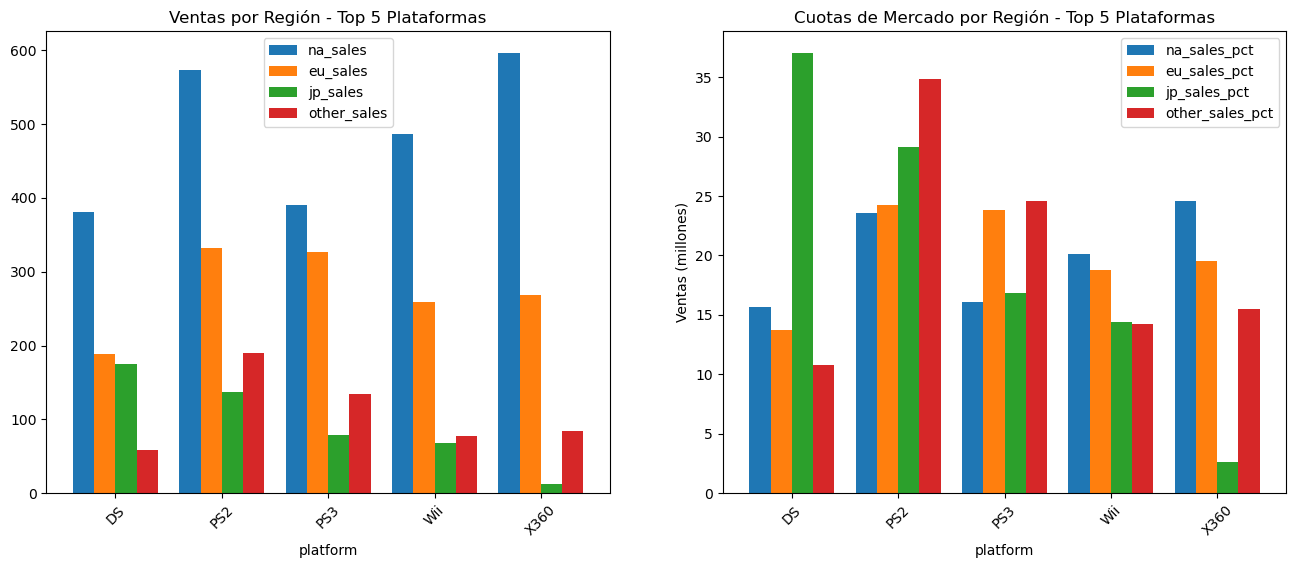

In [24]:
# 4 Perfil de usuario por regiones (NA, EU y JP)
## 4.1 Cuotas de mercado por region de las 5 plataformas principales 

# 5 plataformas con más ventas totales
top_5_plataformas = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)
print("TOP 5 PLATAFORMAS POR VENTAS TOTALES:")
print(top_5_plataformas)
print(f"\nLas 5 plataformas principales son: {list(top_5_plataformas.index)}")

#Paso 2: Analizar cuotas de mercado por región
# Filtrar datos de las 5 plataformas principales
plataformas_principales = list(top_5_plataformas.index)
df_top5 = df[df['platform'].isin(plataformas_principales)]

# Calcular ventas por región para cada plataforma
ventas_por_region = df_top5.groupby('platform').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum', 
    'jp_sales': 'sum',
    'other_sales': 'sum',
    'total_sales': 'sum'
}).round(2)

print("\nVENTAS POR REGIÓN (en millones):")
print(ventas_por_region)

# Calcular porcentajes de cuota de mercado por región
cuotas_mercado = ventas_por_region.copy()
for region in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    total_region = ventas_por_region[region].sum()
    cuotas_mercado[f'{region}_pct'] = (ventas_por_region[region] / total_region * 100).round(1)

print("\nCUOTAS DE MERCADO POR REGIÓN (%):")
print(cuotas_mercado[['na_sales_pct', 'eu_sales_pct', 'jp_sales_pct', 'other_sales_pct']])

#Paso 3: Crear visualizaciones comparativas
# Gráfica de barras agrupadas para mostrar cuotas por región
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfica 1: Ventas absolutas por región
ventas_por_region[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].plot(
    kind='bar', ax=ax1, width=0.8)
ax1.set_title('Ventas por Región - Top 5 Plataformas')
plt.ylabel('Ventas (millones)')
plt.xlabel('Plataforma')
plt.legend(['Norte América', 'Europa', 'Japón', 'Otros'])
ax1.tick_params(axis='x', rotation=45)

# Gráfica 2: Cuotas de mercado por región
cuotas_mercado[['na_sales_pct', 'eu_sales_pct', 'jp_sales_pct', 'other_sales_pct']].plot(
    kind='bar', ax=ax2, width=0.8)
plt.title('Cuotas de Mercado por Región - Top 5 Plataformas')
ax2.tick_params(axis='x', rotation=45)



# Top 5 consolas con mayores ventas

1. PS2     $1,233.56 
2. X360    $  961.24
3. PS3     $  931.33
4. Wii     $  891.18
5. DS      $  802.78

Es Sony con PS2 y PS3 en 1er y 3er lugar respectivamente quien se lleva las mayores ventas de los 3 grandes con más de $2 billones de USD. 

Seguido de Nintendo con Wii y DS en 4to y 5to lugar sumando casi 1,700 Millones de USD. 

En 3er lugar el tio Bill con 360 de Microsoft con casi $1,000 millones de USD. 

## Cuotas de mercado por region Top 5 consolas en ventas

### NA
Para la region de NA X360 siendo muy patrita se lleva el mayor % con un 24.6% del mercado, por consola pero seguido de cerca por 2° y 4to PS2 con 23.6% + PS3 16.1% total 39.7%. 3er Wii 20.1 %, y 5to DS con 15.7% total para Ninentendo de 35.8% del mercado sigue dominano nipon en NA. 

### EU
Para el caso de EU dominan PS2 y PS3 con el 48% del mercado en 1° y 2° lugar seguidos de X360 de Microsoft con 19.5% por consola 3 er lugar total y  Wii+DS dupla Ninentedo con el 32.5% 

### JP
Para JP El orgullo de Nintendo con el 51.4% del mercado nipon seguido de su competencia local y global Sony con 45.9% y Microsfot ni lo intenta al nacionalismo nipon con un modico 2.6%. 

### otras regiones 

Sony 59.4% ganador, Nintendo 25% y Microsoft con 15.5% no tan mal. 

Podemos observar una gran influecia de peso en ciertos mercados con tinte geopolitico e industrias estrategicas tanto para USA como Nipon. 

TOP 5 generos POR VENTAS TOTALES:
genre
Action          1716.52
Sports          1309.66
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Name: total_sales, dtype: float64

Las 5 generos principales son: ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform']

VENTAS POR REGIÓN (en millones):
              na_sales  eu_sales  jp_sales  other_sales  total_sales
genre                                                               
Action          863.17    510.99    160.14       182.22      1716.52
Platform        444.44    199.39    130.71        51.01       825.55
Role-Playing    330.04    188.24    353.39        59.41       931.08
Shooter         584.83    314.52     38.68       103.33      1041.36
Sports          671.20    371.32    134.93       132.21      1309.66

CUOTAS DE MERCADO POR REGIÓN (%):
              na_sales_pct  eu_sales_pct  jp_sales_pct  other_sales_pct
genre                                                                  
Action            

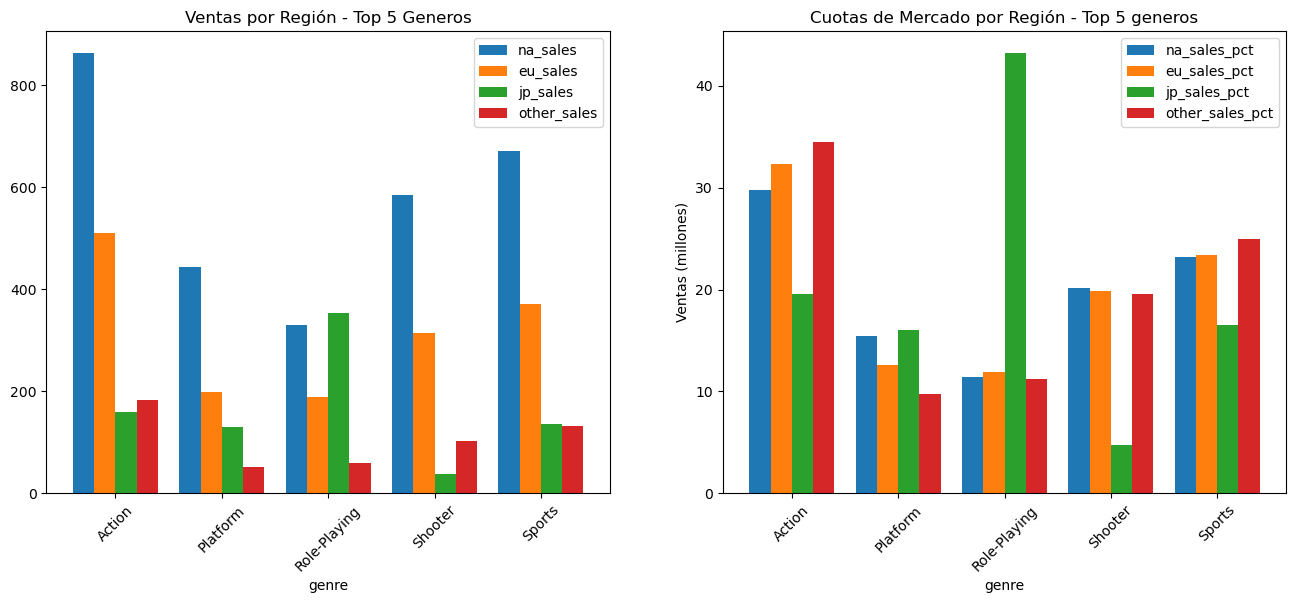

In [25]:
# 4.2 

top_5_generos = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head(5)
print("TOP 5 generos POR VENTAS TOTALES:")
print(top_5_generos)
print(f"\nLas 5 generos principales son: {list(top_5_generos.index)}")

#Paso 2: Analizar cuotas de mercado por región
# Filtrar datos de las 5 plataformas principales
genros_principales = list(top_5_generos.index)
df_top5 = df[df['genre'].isin(genros_principales)]

# Calcular ventas por región para cada plataforma
ventas_por_region = df_top5.groupby('genre').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum', 
    'jp_sales': 'sum',
    'other_sales': 'sum',
    'total_sales': 'sum'
}).round(2)

print("\nVENTAS POR REGIÓN (en millones):")
print(ventas_por_region)

# Calcular porcentajes de cuota de mercado por región
cuotas_mercado = ventas_por_region.copy()
for region in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    total_region = ventas_por_region[region].sum()
    cuotas_mercado[f'{region}_pct'] = (ventas_por_region[region] / total_region * 100).round(1)

print("\nCUOTAS DE MERCADO POR REGIÓN (%):")
print(cuotas_mercado[['na_sales_pct', 'eu_sales_pct', 'jp_sales_pct', 'other_sales_pct']])

#Paso 3: Crear visualizaciones comparativas
# Gráfica de barras agrupadas para mostrar cuotas por región
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfica 1: Ventas absolutas por región
ventas_por_region[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].plot(
    kind='bar', ax=ax1, width=0.8)
ax1.set_title('Ventas por Región - Top 5 Generos')
plt.ylabel('Ventas (millones)')
plt.xlabel('Generos')
plt.legend(['Norte América', 'Europa', 'Japón', 'Otros'])
ax1.tick_params(axis='x', rotation=45)

# Gráfica 2: Cuotas de mercado por región
cuotas_mercado[['na_sales_pct', 'eu_sales_pct', 'jp_sales_pct', 'other_sales_pct']].plot(
    kind='bar', ax=ax2, width=0.8)
plt.title('Cuotas de Mercado por Región - Top 5 generos')
ax2.tick_params(axis='x', rotation=45)

Clasificaciones ESRB disponibles:
rating
desconocido    6676
E              3920
T              2905
M              1536
E10+           1393
EC                8
K-A               3
AO                1
RP                1
Name: count, dtype: int64

Total de juegos con clasificación: 16443

Ventas por clasificación ESRB:
             ventas_totales  promedio_por_juego  num_juegos
rating                                                     
desconocido         2822.10                0.42        6676
E                   2407.60                0.61        3920
T                   1473.08                0.51        2905
M                   1462.53                0.95        1536
E10+                 640.98                0.46        1393
K-A                    4.32                1.44           3
AO                     1.96                1.96           1
EC                     1.75                0.22           8
RP                     0.04                0.04           1

VENTAS POR REGIÓN 

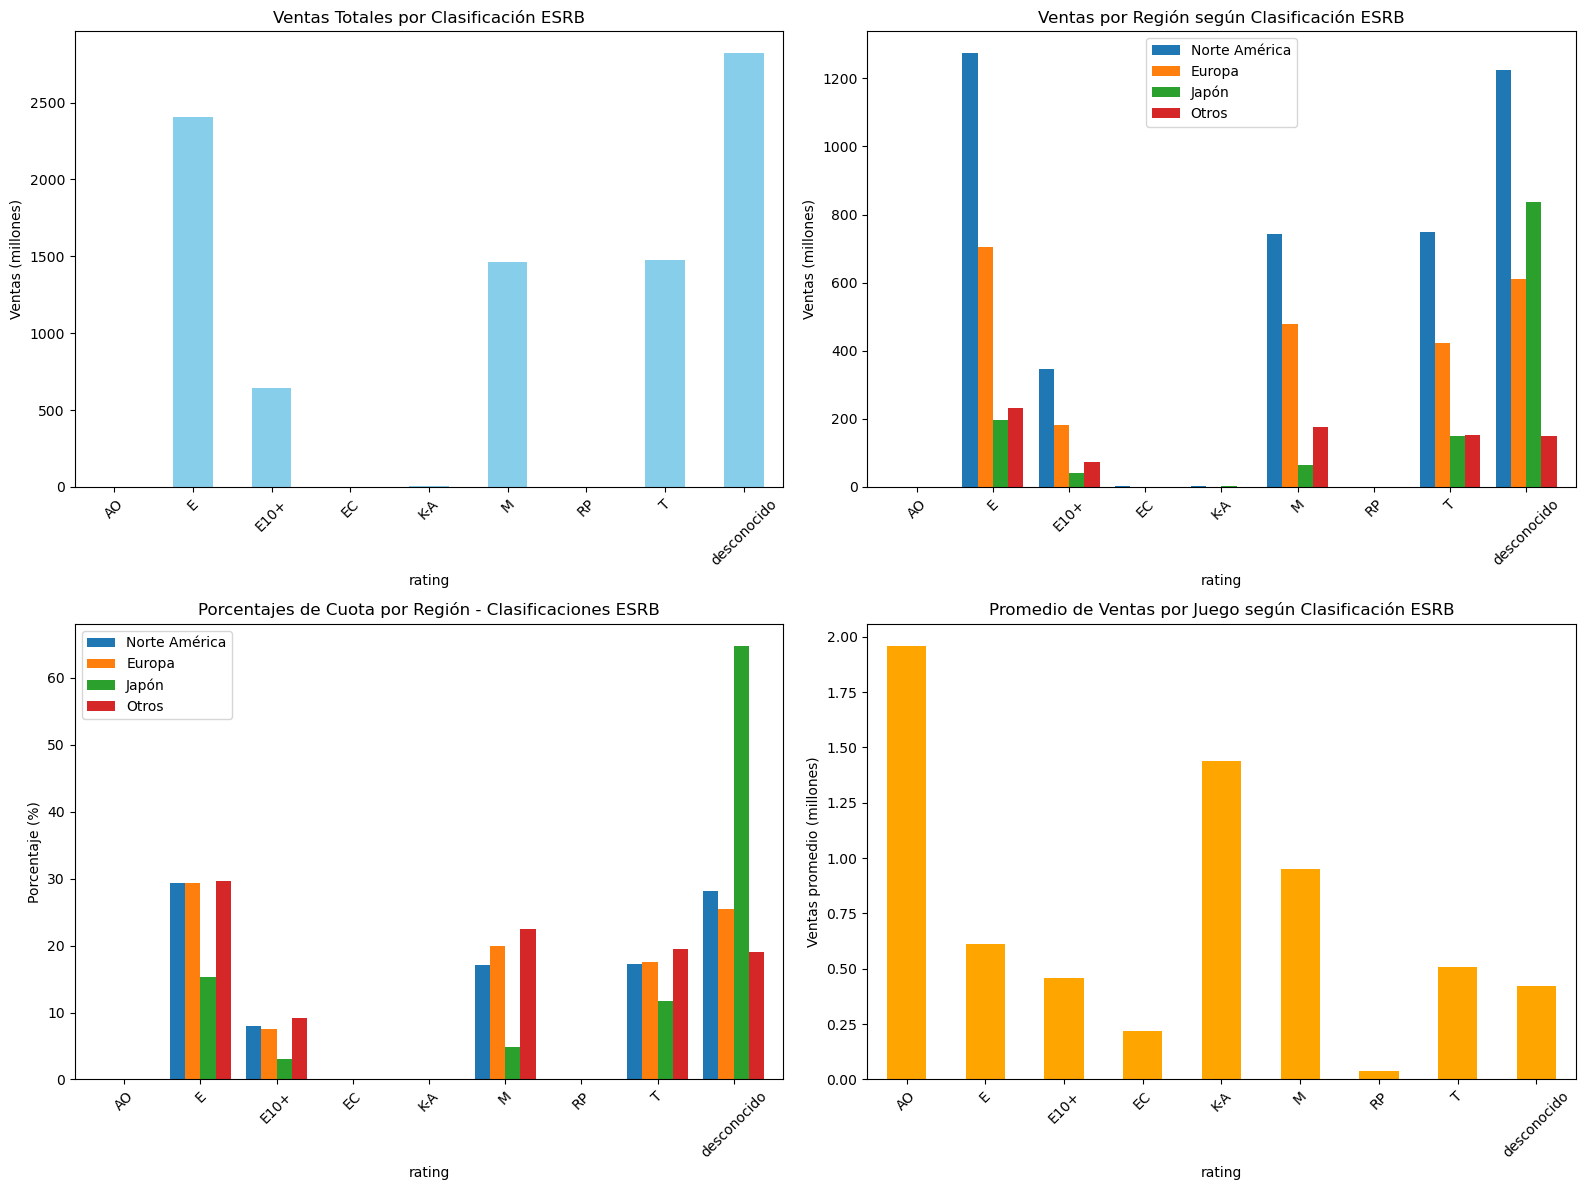

In [42]:
# 4.3 Clasificaciones ESRB

# Verificar qué clasificaciones ESRB tenemos
print("Clasificaciones ESRB disponibles:")
print(df['rating'].value_counts())
print(f"\nTotal de juegos con clasificación: {df['rating'].value_counts().sum()}")

# Ver distribución de ventas por clasificación
ventas_por_rating = df.groupby('rating')['total_sales'].agg(['sum', 'mean', 'count']).round(2)
ventas_por_rating.columns = ['ventas_totales', 'promedio_por_juego', 'num_juegos']
print("\nVentas por clasificación ESRB:")
print(ventas_por_rating.sort_values('ventas_totales', ascending=False))

# Analizar ventas por región según clasificación ESRB
ventas_rating_region = df.groupby('rating').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum', 
    'jp_sales': 'sum',
    'other_sales': 'sum',
    'total_sales': 'sum'
}).round(2)

print("\nVENTAS POR REGIÓN SEGÚN CLASIFICACIÓN ESRB (millones):")
print(ventas_rating_region)

# Calcular porcentajes por región
cuotas_rating = ventas_rating_region.copy()
for region in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    total_region = ventas_rating_region[region].sum()
    cuotas_rating[f'{region}_pct'] = (ventas_rating_region[region] / total_region * 100).round(1)

print("\nPORCENTAJES DE CUOTA POR REGIÓN:")
print(cuotas_rating[['na_sales_pct', 'eu_sales_pct', 'jp_sales_pct', 'other_sales_pct']])

# Gráficas comparativas
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Gráfica 1: Ventas totales por clasificación
ventas_rating_region['total_sales'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Ventas Totales por Clasificación ESRB')
ax1.set_ylabel('Ventas (millones)')
ax1.tick_params(axis='x', rotation=45)

# Gráfica 2: Comparación por regiones
ventas_rating_region[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].plot(
    kind='bar', ax=ax2, width=0.8)
ax2.set_title('Ventas por Región según Clasificación ESRB')
ax2.set_ylabel('Ventas (millones)')
ax2.legend(['Norte América', 'Europa', 'Japón', 'Otros'])
ax2.tick_params(axis='x', rotation=45)

# Gráfica 3: Porcentajes de cuota por región (ESTA FALTABA)
cuotas_rating[['na_sales_pct', 'eu_sales_pct', 'jp_sales_pct', 'other_sales_pct']].plot(
    kind='bar', ax=ax3, width=0.8)
ax3.set_title('Porcentajes de Cuota por Región - Clasificaciones ESRB')
ax3.set_ylabel('Porcentaje (%)')
ax3.legend(['Norte América', 'Europa', 'Japón', 'Otros'])
ax3.tick_params(axis='x', rotation=45)

# Gráfica 4: Promedio de ventas por juego según clasificación (ESTA TAMBIÉN FALTABA)
ventas_por_rating['promedio_por_juego'].plot(kind='bar', ax=ax4, color='orange')
ax4.set_title('Promedio de Ventas por Juego según Clasificación ESRB')
ax4.set_ylabel('Ventas promedio (millones)')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Anslisis de Clasificacion del video juego vs ventas totales

## Gráfica 1: Ventas Totales por Clasificación

### Hallazgos:
"Desconocido" lidera con 2,822M (juegos sin clasificación clara)
"E" (Everyone) en 2° lugar con 2,407M
"T" (Teen) y "M" (Mature) muy parejos: ~1,470M y ~1,460M
Los juegos familiares (E) y sin clasificación dominan el mercado, pero los juegos para adolescentes y adultos también tienen ventas muy sólidas.

## Gráfica 2: Ventas por Región según Clasificación

### Patrones regionales importantes:
NA: Prefieren juegos "E", "T" y "M" de forma equilibrada
EU: Similar a NA, pero con mayor preferencia por "M" (Mature)
JP: Dominio absoluto de "Desconocido" (64.8% del mercado)
Otros países: Patrón similar al occidental

## Gráfica 3: Porcentajes de Cuota por Región

Diferencias culturales clave:

Japón vs Occidente:

JP: 64.8% "desconocido", solo 4.9% "M" (contenido maduro)
NA/EU: 17-20% "M", mayor diversidad en clasificaciones
Esto sugiere:

Japón tiene diferentes estándares de clasificación
Occidente es más permisivo con contenido maduro

## Gráfica 4: Promedio de Ventas por Juego
Rentabilidad por clasificación:

"AO" (Adults Only): 1.96M promedio (pero solo 1 juego)
"K-A": 1.44M promedio
"M" (Mature): 0.95M promedio ⭐
"E": 0.61M promedio

## Conclusiones Estratégicas
¿Las clasificaciones ESRB afectan las ventas regionales?
¡SÍ, definitivamente!
Japón rechaza contenido clasificado como "Mature" (solo 4.9%)
Occidente abraza la diversidad de contenido
Juegos "M" tienen el mayor promedio de ventas por título
Diferencias culturales son muy marcadas entre regiones. 

In [43]:
# 5.1 Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

from scipy import stats as st

print(df["platform"].unique())

pc_score = df[df["platform"] == "PC"]["user_score"] 

xone_score = df[df["platform"] == "XOne"]["user_score"]

print(f"Juegos de PC: {len(pc_score)}")
print(f"Juegos de Xbox One: {len(xone_score)}")
print(f"Promedio PC: {pc_score.mean():.2f}")
print(f"Promedio Xbox One: {xone_score.mean():.2f}")

# Prueba t de Student

alpha = 0.05 #nivel crítico de significación estadística o cofianza en 95% 

results = st.ttest_ind(pc_score, xone_score, equal_var = False) # este código: prueba la hipótesis de que las medias de las calificaciones de los usuarios de Xbox y PC son iguales

print(f'valor p: {results.pvalue:.6f}') # tu código: imprime el valor p obtenido)

if results.pvalue < alpha:# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula- las medias son diferentes")
else:
    print("No podemos rechazar la hipótesis nula, porque las medias son similares")

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Juegos de PC: 957
Juegos de Xbox One: 247
Promedio PC: 7.07
Promedio Xbox One: 6.52
valor p: nan
No podemos rechazar la hipótesis nula, porque las medias son similares


## 5.1 Resultados Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

Aunque como vemos en la ceda anterior las medias son bastante similares en los valores de ambos casos con una diferencia de 0.82 en el promedio para el nivel de confianza del 95% o alpha de 5% no se rechaza la hipotesis nula ya que si hay una variacion importante en terminos relativos. 

Formule para este caso la hipotesis nula como todas las H0 como que no hay cambio en los valores propuestos y la alternativa h1 como que si haya variación entre las medias de la calificacion de los usuarios de X box One y de PC ambas plataformas de microsft. 

In [47]:
from scipy import stats as st

# 5.2 Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

print(df["genre"].unique()) # esta linea me sireve para tener el nombre exacto de los generos

action_score = df[df["genre"] == "Action"]["user_score"] 

sport_score = df[df["genre"] == "Sports"]["user_score"]

print(f"Juegos de Acción: {len(action_score)}")
print(f"Juegos de Deportes: {len(sport_score)}")
print(f"Promedio PC: {action_score.mean():.2f}")
print(f"Promedio Xbox One: {sport_score.mean():.2f}")

# Prueba t de Student

alpha = 0.05 # nivel crítico de significación estadística o cofianza en 95% 

results = st.ttest_ind(action_score, sport_score, equal_var = False) # este código: prueba la hipótesis de que las medias de las calificaciones de los usuarios de Xbox y PC son iguales

print(f'valor p: {results.pvalue:.4f}') # tu código: imprime el valor p obtenido)


if results.pvalue < alpha:# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula- las medias Si son diferentes")
else:
     print("No podemos rechazar la hipótesis nula, porque no hay evidencia suficiente de que la las medias son diferentes")

# Para verificar que no haya afectacion de varianzas distintas o que sean homogeneas las vrianzas usamos la prueba de Levene: 

# Tus datos (ejemplo con PC vs Xbox One)
pc_score = df[df["platform"] == "PC"]["user_score"]
xone_score = df[df["platform"] == "XOne"]["user_score"]

# PASO 1: Test de Levene para verificar igualdad de varianzas
levene_stat, levene_p = st.levene(pc_score, xone_score)
print(f"Test de Levene - p-value: {levene_p:.6f}")

# PASO 2: Decidir equal_var basándote en Levene
alpha = 0.05
if levene_p > alpha:
    equal_var = True
    print("Las varianzas son iguales (usamos equal_var=True)")
else:
    equal_var = False
    print("Las varianzas son diferentes (usamos equal_var=False)")

# PASO 3: Realizar t-test con el parámetro correcto
t_stat, t_p = st.ttest_ind(pc_score, xone_score, equal_var=equal_var)
print(f"T-test - p-value: {t_p:.6f}")

if t_p < alpha:
    print("Rechazamos H0: Las medias son diferentes")
else:
    print("No rechazamos H0: No hay evidencia de diferencia en medias")

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Juegos de Acción: 3307
Juegos de Deportes: 2305
Promedio PC: 7.06
Promedio Xbox One: 6.95
valor p: nan
No podemos rechazar la hipótesis nula, porque no hay evidencia suficiente de que la las medias son diferentes
Test de Levene - p-value: nan
Las varianzas son diferentes (usamos equal_var=False)
T-test - p-value: nan
No rechazamos H0: No hay evidencia de diferencia en medias


# 5.2 Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

En este caso No podemos rechazar la hipótesis nula, porque no hay evidencia suficiente de que la las medias son diferentes, como siempre la H0 o hipotesis nula es que no hay variación. 

Formule para este caso la hipotesis nula como todas las H0 como que no hay cambio en los valores propuestos y la alternativa h1 como que si haya variación entre las medias de la calificacion de los usuarios del genero accion y deportes. Para probar la hipotesisi usamos T de student ya que es el mejor para probar con el parametro equal_var = False, este parámetro le dice a la función que NO asuma que las varianzas de ambos grupos son iguales. Importa ya que estos 2 grupos a comprar pueden tener variaciones importantes. 
Diferentes tamaños de muestra: Tienes 3,307 juegos de Acción vs 2,305 juegos de Deportes
Diferentes géneros: Los géneros pueden tener patrones de calificación muy distintos
Más conservador: Es la opción más segura cuando no estás seguro sobre las varianzas. 

# 6 conclusiones generales

Como conslusion general para las ventas y pronosotico de ventas para el 2017 de la tienda mundial en linea de "Ice",  para poder planificar campaña de marketing para dicho año 2017. 

Los principales drivers y hallazgos relevante del anañisis de la data del df que nos pueden servir para  para  entender el comportanmiento de las ventas y las relaciones de diversas variables de la insustria para una proyeccion a 2017. 

1. De la data de 1980 al año 2000 no hubieron tantos juegos estos se comenzarona  incrementar hacia 2011 al llegando al pico de produccion en 2009 y bajando para 2016.

2. La cantidad de plataformas y juegos incidio también en aumentos considerables en las ventas globales de video juegos llegando tambien en 2008 / 2009 a un pico de casi $700 USD de ventas globales. y decrecimiento de 2010 a 2016 muy posiblemente aunque no tenemos la data para concluirlo que se deba a la proliferacion de dispositivos moviles como tabletas y celulares inteligentes que permitieron juegos mas complejos al alcance del bolsillo generando un nuevo paradigma de jugadores y con otra logica de tiempos, mientras se espera en la fila, etc. que uanque ya existian dispositivos portatiles como el game boy GB estos tenian la limitación del cartucho y de que el dispositivo solo sirve para jugar a diferencias de los antes mencionados que sirven como multi propositos.

3. Los principales actores en las ventas analizadas por plataformas sin considerar mobile, son la empresas Sony con sus PS play station, microsoft xbox y el pionero e inovador Nintendo.Rondadndo en los 1200 USD a 700 para el top 6 de ahi se van a $300 M USD con caidas importante para el PS4 lanzado en 2013. 

4. Las plataformas tienen un tiempo de vida promedio de 9 años y de 5.5 años de ventas más significativas.Y el lanzamineto de la siguiente generacion se da entre cada 4 a 6 años. 

5. Las ventas promedio por video juego se lleva Nintendo que es en general el disruptor y pionero de la industria con el mercado del ultra hit.

6. Las calificaciones de usuarios o ciriticos tienen una correalcion positiva de moderada lijera y debril para la mayoria de las plataformas y video juegos hay más factores que inciden en la venta, por lo que pudimos observar pero no se cuenta con cuantificaciones de esos otros parametros.

7. En cuanto a juegos que se lanzan en formato multiplataforma hay por lo general una plataforma lider con un % mayor de cuota de mercado y otras 2 o 3 plataformas ya sea otra generacion de la misma compañia o de la competencias con cuptas del mercado relevante.

8. Ventas por genero de video juegos hay ciertas categorias, accion, deportes, shooter, role playing y platform con el top 5 aunque algunas no existina desde el inicio como las de deportes que fue una onovacion de Nintendo con el wii sports disrurumpiendo como ave fenix la industria.

9. A nivel de regiones NA y EU tienen como accidentales comportamientos por categorias similares y con mayor penetracion de firmas como Microsoft pero en el caso de Japon al ser orientales la cultura si modifica sustancialmente los gustos por juegos ás pacificos o generos menos violentos que en occidente. Hay componentes importantes de la cultura en el consumo de contenidos y los video juegos no son la excepcion.

10. En cuanto a las clasificaciones "Desconocido" lidera con 2,822M (juegos sin clasificación clara) "E" (Everyone) en 2° lugar con 2,407M "T" (Teen) y "M" (Mature) muy parejos: ~1,470M y ~1,460M Los juegos familiares (E) y sin clasificación dominan el mercado, pero los juegos para adolescentes y adultos también tienen ventas muy sólidas. Y estas como los generos tambien varían en occidente y oriente.

# Conclusion final 

Podemos ver un panorama con un comportamiento estable a años anteriores para 2017 a menos que Nintendo o un nuevo jugador de gran escala entre en la industria con alguna innovacion disruptiva ya sea en genero, tipo de plataforma, modelo de negocio,  o varias no vista hasta el momento que cambie los patrones de conducta de los consumidores de manera significativa. 
